### IRis flower page 17

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
n_samples, n_features = iris.data.shape
print("Number of samples: ", n_samples)
print("Number of features: ", n_features)
#the spal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples:  150
Number of features:  4
[5.1 3.5 1.4 0.2]


In [6]:
#Flower with the indices 12, 26,89, and 114
iris.data[[12,26,89,114]]


array([[4.8, 3. , 1.4, 0.1],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 2.5, 4. , 1.3],
       [5.8, 2.8, 5.1, 2.4]])

In [8]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris.data[iris.target==1][:5]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [13]:
iris.data[iris.target==1,0][:5]

array([7. , 6.4, 6.9, 5.5, 6.5])

### Histograms of the Features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_59988\787899450.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


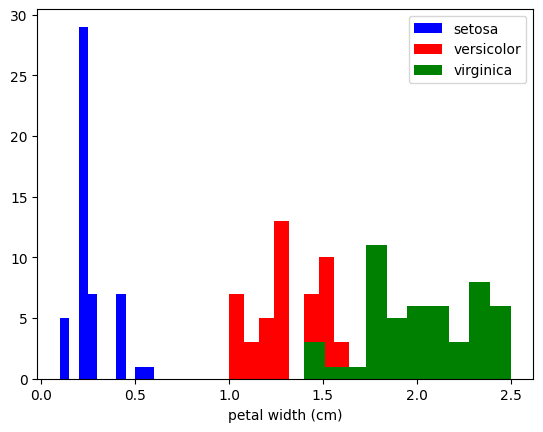

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_index = 3
colors = ['blue','red','green']

for label,color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target ==label, x_index],
           label = iris.target_names[label],
           color=color)
ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
fig.show()

### Scatterplot with two features

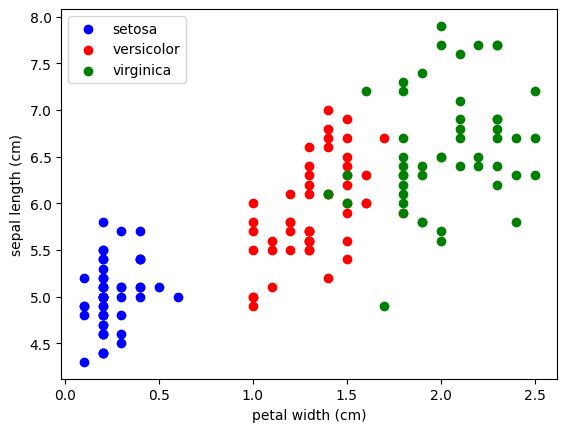

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_index = 3
y_index = 0

color = ['blue','red','green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.scatter(iris.data[iris.target==label, x_index],
                        iris.data[iris.target==label, y_index],
                        label = iris.target_names[label],
                        c=color)
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

### Generalization

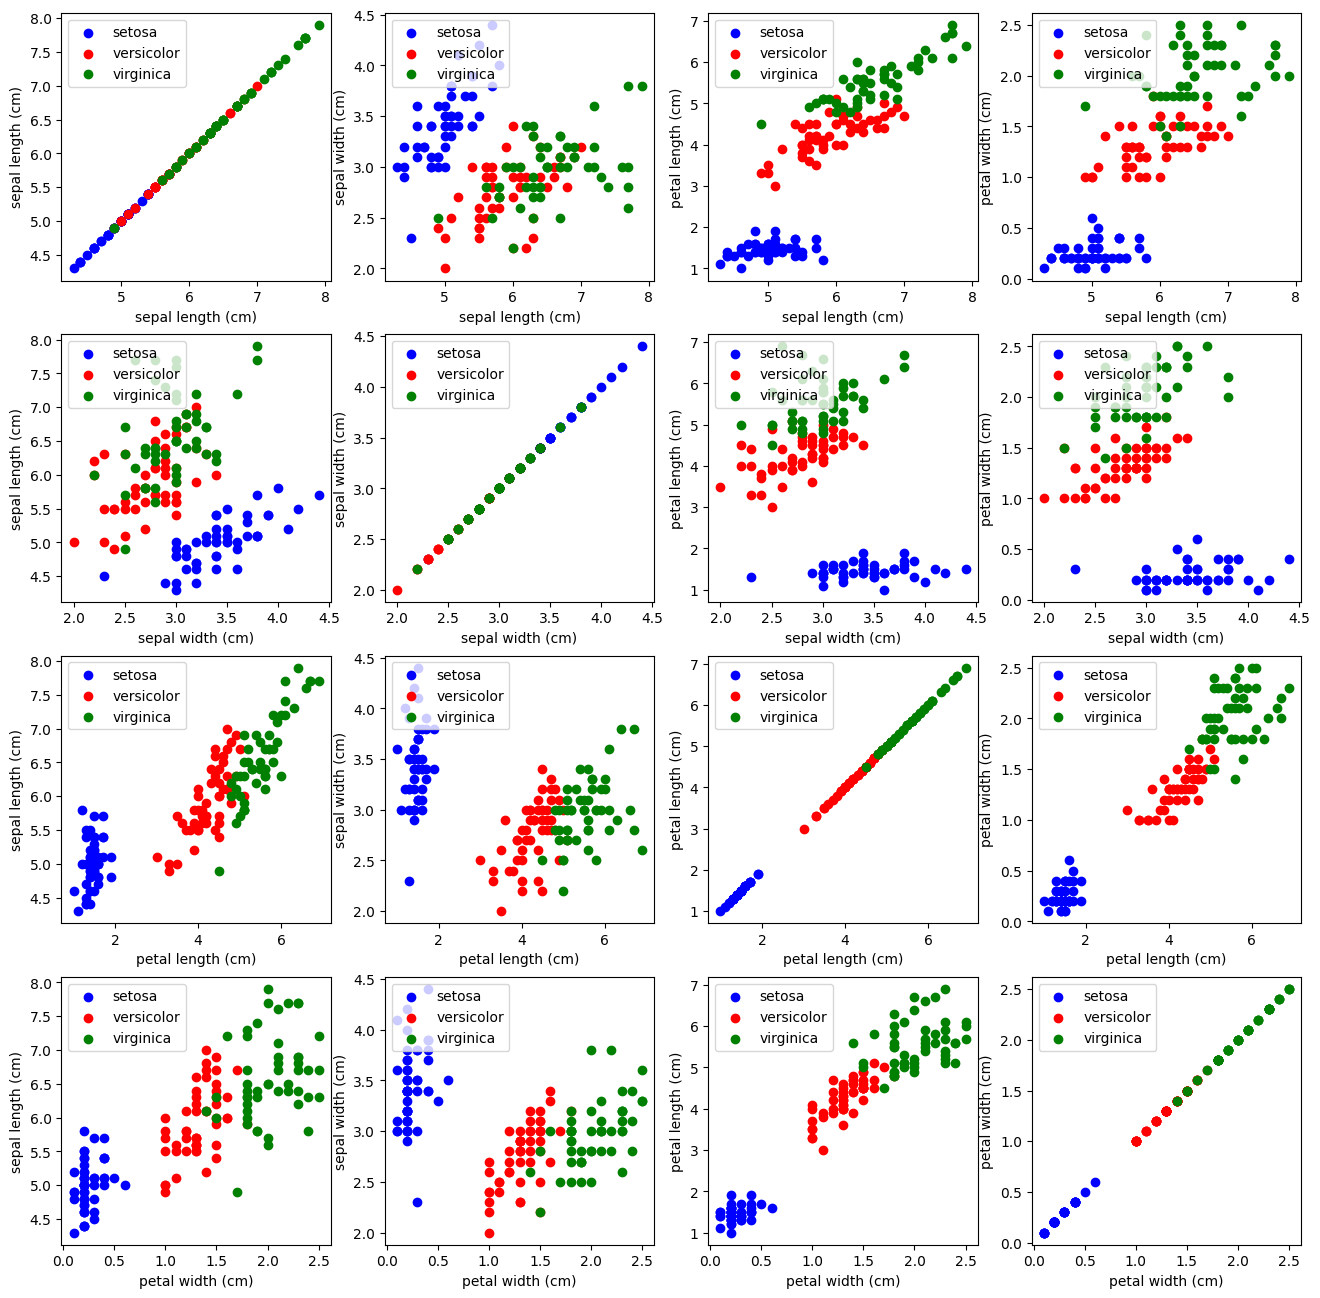

In [26]:
import matplotlib.pyplot as plt
n = len(iris.feature_names)
fig, ax = plt.subplots(n,n, figsize = (16,16))

colors = ['blue','red','green']

for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x,y].scatter(iris.data[iris.target==color_ind,x],
                                     iris.data[iris.target==color_ind,y],
                                     label = iris.target_names[color_ind],
                                     c=colors[color_ind])
        
        ax[x,y].set_xlabel(xname)
        ax[x,y].set_ylabel(yname)
        ax[x,y].legend(loc='upper left')
plt.show()

### Scatterplot Marices

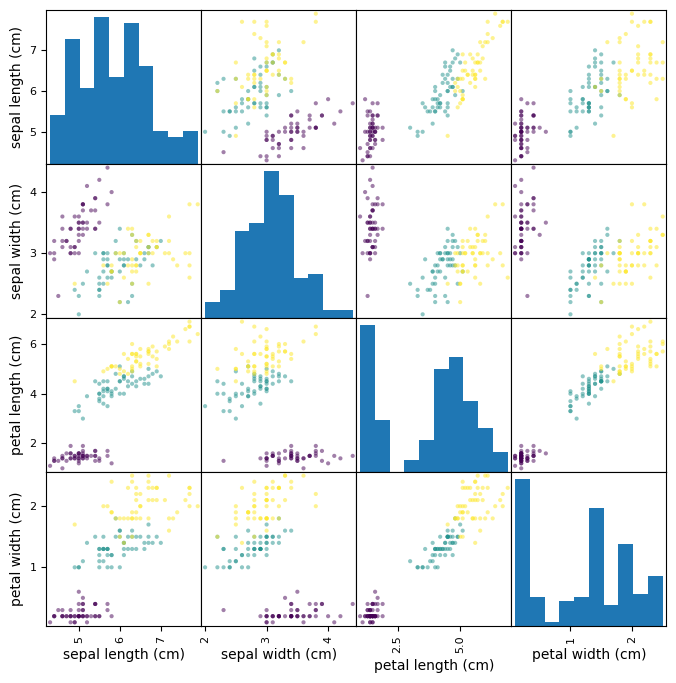

In [28]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8,8));

### 3-Dimensional Visualization

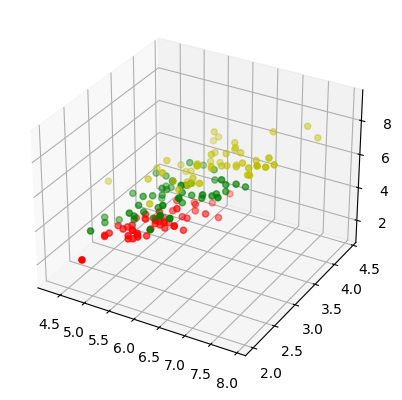

In [30]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = load_iris()
x=[]
for iclass in range(3):
    x.append([[],[],[]])
    for i in range(len(iris.data)):
        if iris.target[i] == iclass:
            x[iclass][0].append(iris.data[i][0])
            x[iclass][1].append(iris.data[i][1])
            x[iclass][2].append(sum(iris.data[i][2:]))

colours = ('r','g','y')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(x[iclass][0],x[iclass][1],x[iclass][2],c= colours[iclass])
plt.show()

### Loading Digits Data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [4]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


In [5]:
print("Shape of an Item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data type of an item: ", type(digits.images[0]))

Shape of an Item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data type of an item:  <class 'numpy.ndarray'>


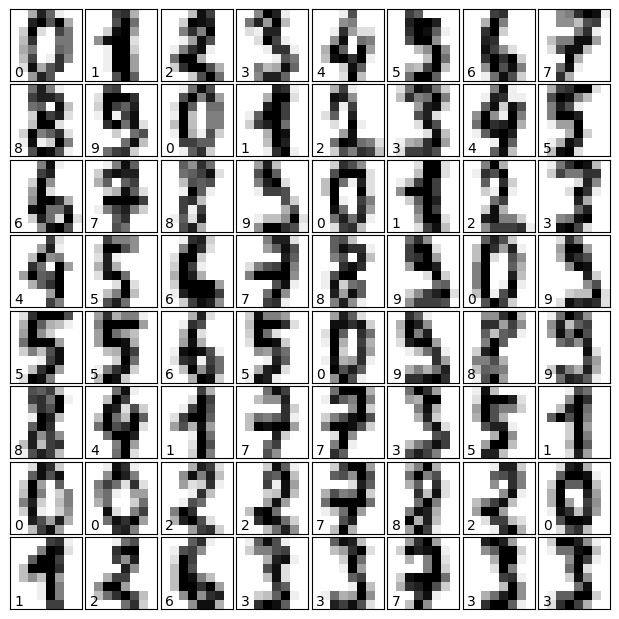

In [8]:
#set up the figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) #figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    #label the image with the target value
    ax.text(0,7,str(digits.target[i]))

### Exercise 1:

sklearn contains a "wine data set".  
* Find and load this data set  
* Can you find a description?  
* What are the names of the classes?  
* What are the features?
* Where is the data and the labeled data?

In [12]:
#loading the wine data set
from sklearn import datasets
wine = datasets.load_wine()
#decription can be accessed via "DESCR"
print(wine.DESCR)
# name of the classes
print(wine.target_names)
#features
print(wine.feature_names)
#data and labeled data
data = wine.data
labelled_data = wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

### Exercise 2:  
Create a scatte plot of the features ash <b> ash </b> and <b> color_intensity </b> of the wine data set.

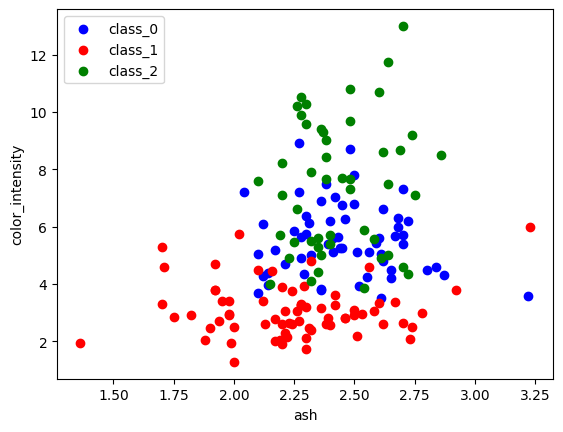

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt

wine = datasets.load_wine()
features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),
                 wine.feature_names.index(features[1])]

colors = ['blue','red','green']
for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label,features_index[0]],
               wine.data[wine.target==label,features_index[1]],
               label = wine.target_names[label],c=color)
    
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show()

### Exercise 3:  
Create a scatter matrix of the features of the wine dataset.

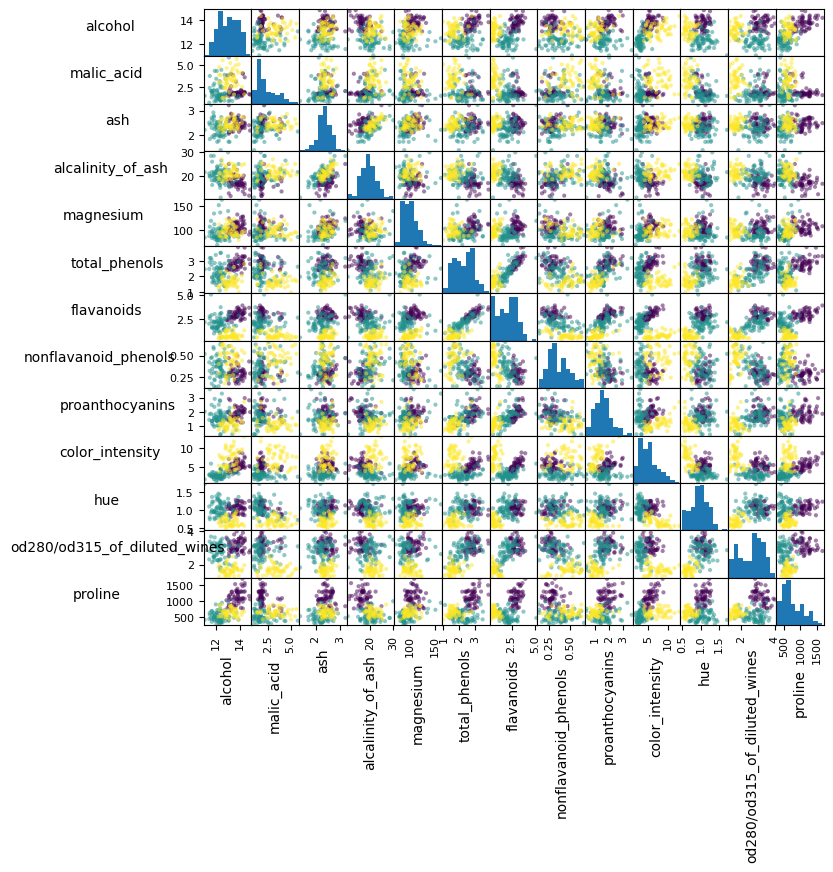

In [16]:
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
def rotate_labels(df, axes):
    """changing the rotation of the label output,
    y labels horizontal and x labels vertical"""
    n = len(df.columns)
    for x in range(n):
        for y in range(n):
            #to get the axis of subplots
            ax = axs[x,y]
            #to make x axis name vertical
            ax.xaxis.label.set_rotation(90)
            #to make y axis name horizontal
            ax.yaxis.label.set_rotation(0)
            #to nale sure y axis names are outside the plot area
            ax.yaxis.labelpad = 50
            
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
axs = pd.plotting.scatter_matrix(wine_df,
                                c=wine.target,
                                figsize=(8,8),
                                );
rotate_labels(wine_df, axs)

### Exercise 4:
Fetch the Olivetti faces dataset and visualize the faces.

In [17]:
from sklearn.datasets import fetch_olivetti_faces
#fetch the faces data
faces = fetch_olivetti_faces()
faces.keys()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Lenovo\scikit_learn_data


dict_keys(['data', 'images', 'target', 'DESCR'])

In [18]:
n_samples, n_features = faces.data.shape
print(n_samples, n_features)

400 4096


In [20]:
import numpy as np
np.sqrt(4096)

64.0

In [21]:
faces.images.shape

(400, 64, 64)

In [22]:
faces.data.shape

(400, 4096)

In [23]:
print(np.all(faces.images.reshape((400,4096)) == faces.data))

True


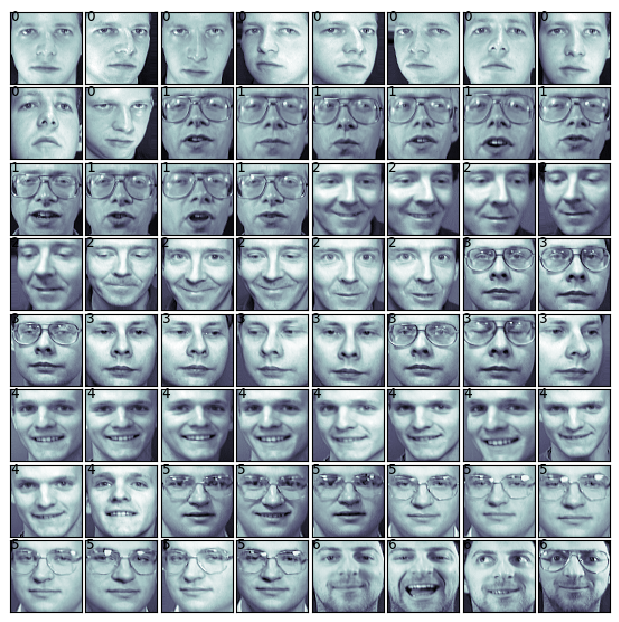

In [28]:
#set up the figure
fig = plt.figure(figsize=(6,6)) #figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,hspace=0.05,wspace=0.05)
#plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone,interpolation='nearest')
    # label the image with the target value
    ax.text(0,7, str(faces.target[i]))

### Generate Synthetical Data

In [29]:
import numpy as np
import pandas as pd
cities = ['Berlin','Frankfurt','Hamburg',
          'Nuremberg','Munich','Stuttgart',
          'Hanover','Saarbruecken','Cologne',
          'Constance','Freiburg','Karlsruhe']
n = len(cities)
data = {'Temperature': np.random.normal(24,3,n),
        'Humidity': np.random.normal(78,2.5,n),
        'Wind': np.random.normal(15,4,n)}
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
Berlin,25.100705,78.137486,17.911901
Frankfurt,20.907942,79.954936,20.805742
Hamburg,20.069242,81.777523,10.884198
Nuremberg,21.457957,77.673657,16.762165
Munich,24.121102,83.382931,14.021603
Stuttgart,24.516586,79.703912,18.457483
Hanover,22.454180,76.286930,16.922764
Saarbruecken,26.562149,73.018707,12.796545
Cologne,25.771487,79.874109,17.761120
Constance,32.493539,77.839912,18.084896


### Code page 42

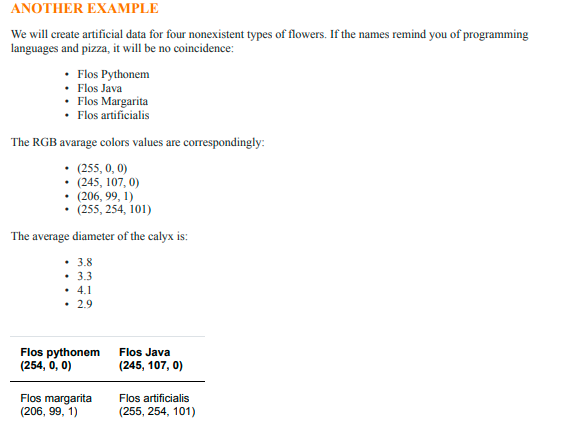

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import truncnorm

def truncated_normal (mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm(
        (low - mean)/sd, (upp - mean)/sd, loc=mean, scale=sd)

def truncated_normal_floats(mean=0, sd=1, low=0, upp=10,num=100):
    res = truncated_normal(mean=mean,sd=sd,low=low,upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0, sd=1,low=0,upp=10,num=100):
    res = truncated_normal(mean=mean, sd=sd,low=low,upp=upp)
    return res.rvs(num).astype(np.uint8)

# number of items for each flowe class
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}

#flos pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254,sd=18,low=235,upp=256,num=number_of_items)
greens = truncated_normal_ints(mean=107,sd=11,low=88,upp=127,num=number_of_items)
blues =  truncated_normal_ints(mean=0,sd=15,low=0,upp=20,num=number_of_items)
calyx_dia  = truncated_normal_floats(3.8,0.3,3.4,4.2,num=number_of_items)
data = np.column_stack((reds,greens,blues,calyx_dia))
flowers["flos_pythonem"] = data

#flos Java
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=245,sd=17,low=226,upp=256,num=number_of_items)
greens = truncated_normal_ints(mean=107,sd=11,low=88,upp=127,num=number_of_items)
blues =  truncated_normal_ints(mean=0,sd=10,low=0,upp=20,num=number_of_items)
calyx_dia  = truncated_normal_floats(3.3,0.3,3.0,3.5,num=number_of_items)
data = np.column_stack((reds,greens,blues,calyx_dia))
flowers["flos_java"] = data

#flos margarita
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data

data = np.concatenate((flowers["flos_pythonem"],
                        flowers["flos_java"],
                        flowers["flos_margarita"],
                        flowers["flos_artificialis"]
                        ), axis=0)

# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num



In [38]:
target_trimmed = target[:780]
conc_data = np.concatenate((data, target_trimmed.reshape(target_trimmed.shape[0], 1)), axis=1)
#conc_data = np.concatenate((data, target.reshape(target.shape[0],1)),axis=1)
np.savetxt("data/strange_flowers.txt", conc_data, fmt="%2.2f",)


In [36]:
print(len(data))
print(len(target))


780
795


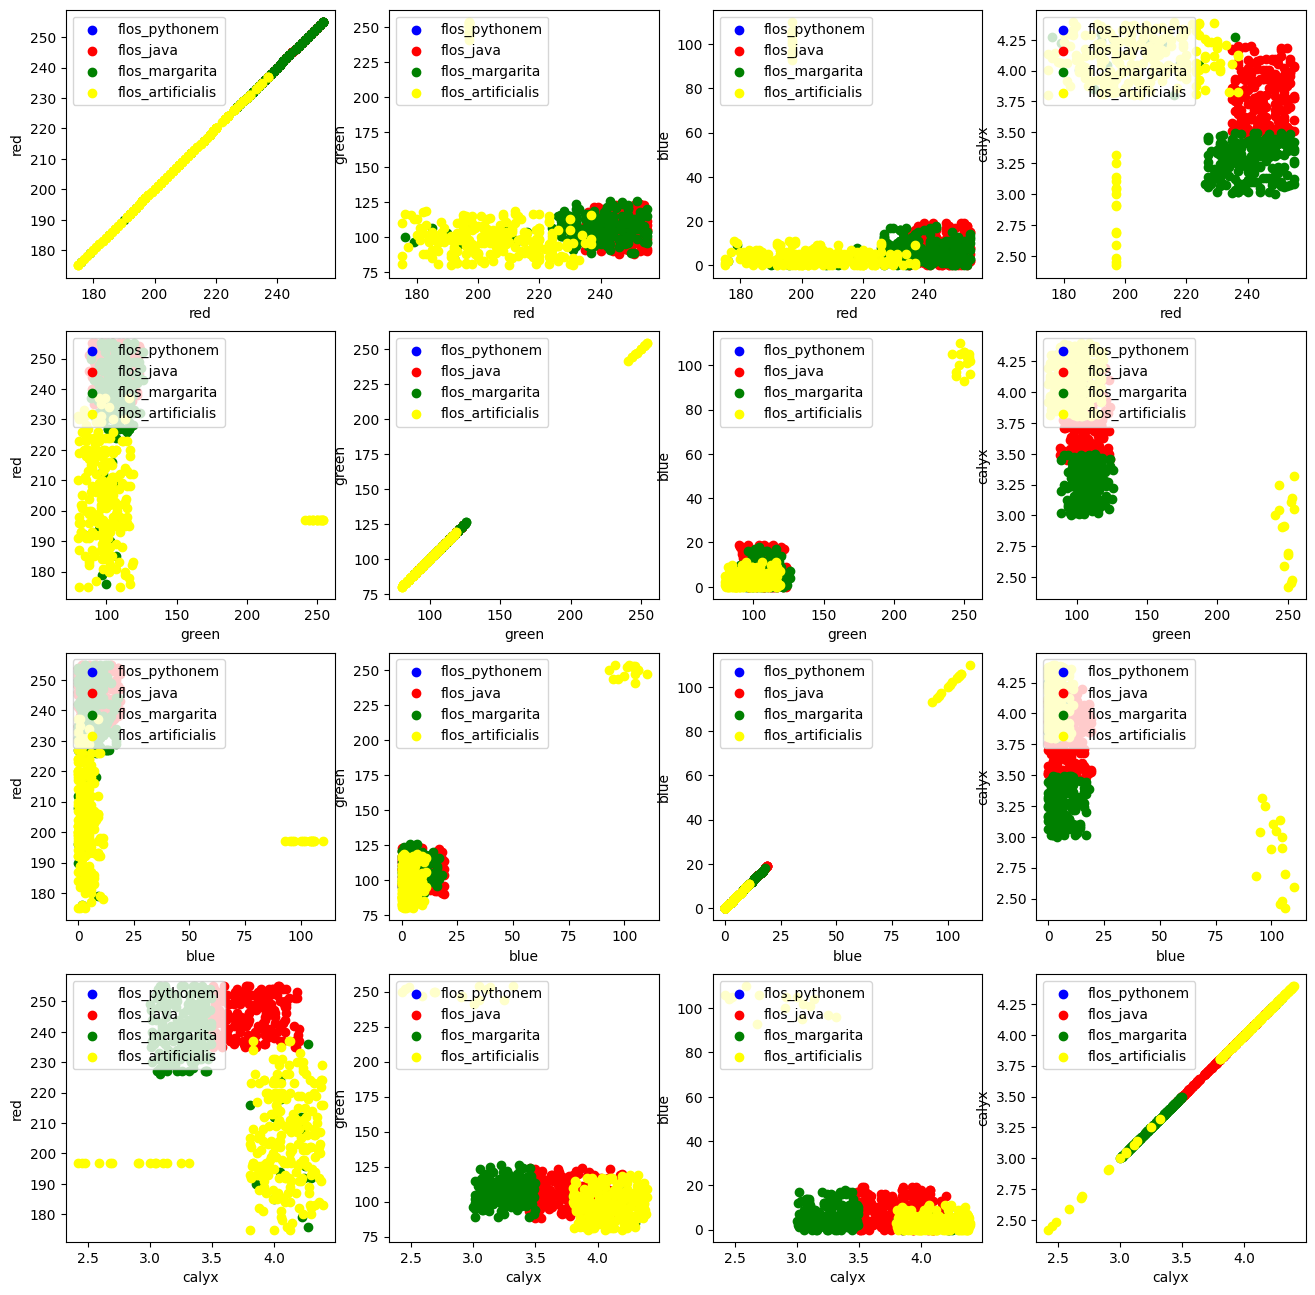

In [40]:
import matplotlib.pyplot as plt
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target_trimmed==color_ind, x],
                            data[target_trimmed==color_ind, y],
                            label=target_names[color_ind],
                            c=colors[color_ind])
        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')   
plt.show()

### Page47

#### Generators for classification and clustering

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_classes = 4
data, labels = make_blobs(n_samples=1000, centers= n_classes, random_state=100)
labels[:7]

array([1, 3, 1, 3, 1, 3, 2])

#### Visualize the blob

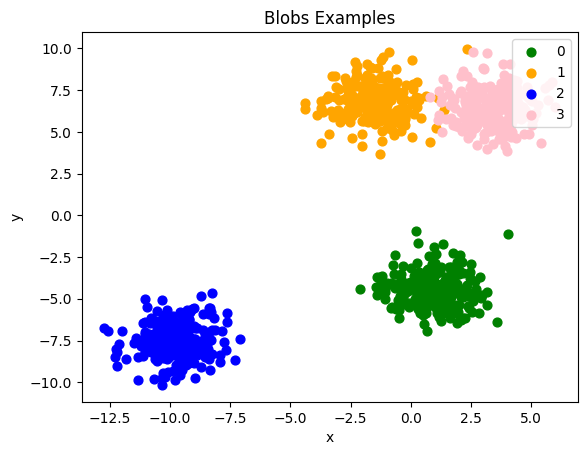

In [5]:
fig, ax = plt.subplots()

colours = ('green','orange','blue','pink')
for label in range(n_classes):
    ax.scatter(x=data[labels==label,0],
              y=data[labels==label,1],
              c=colours[label],
              s=40,
              label=label)

ax.set(xlabel='x',
      ylabel='y',
      title='Blobs Examples')
ax.legend(loc='upper right')


#### Create list with center point

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[2,3],[4,5],[7,9]]
data, labels = make_blobs(n_samples=1000,
                         centers=np.array(centers),
                         random_state=1)
labels[:7]
data.shape

(1000, 2)

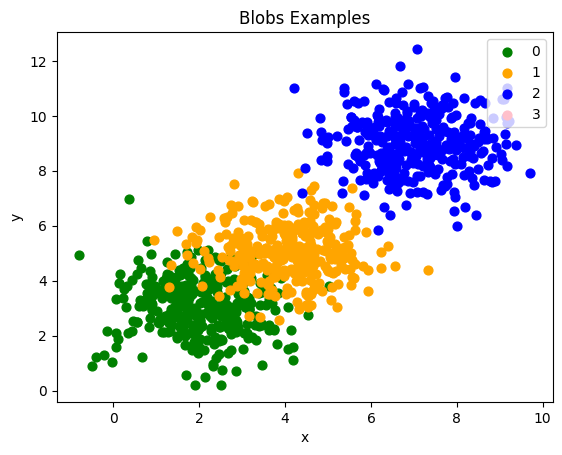

In [14]:
fig, ax = plt.subplots()

colours = ('green','orange','blue','pink')
for label in range(n_classes):
    ax.scatter(x=data[labels==label,0],
              y=data[labels==label,1],
              c=colours[label],
              s=40,
              label=label)

ax.set(xlabel='x',
      ylabel='y',
      title='Blobs Examples')
ax.legend(loc='upper right')

#### Save file 

In [19]:
import numpy as np
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:7]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ]])

In [21]:
np.savetxt("squirrels.txt",
          all_data,
          fmt=['%.3f', '%.3f', '%1d'])
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

### Conversion into Data and Labels

## Page51

In [3]:
import numpy as np
file_data = np.loadtxt("squirrels.txt")

data = file_data[:,:-1]
labels = file_data[:,2:]

labels = labels.reshape((labels.shape[0]))

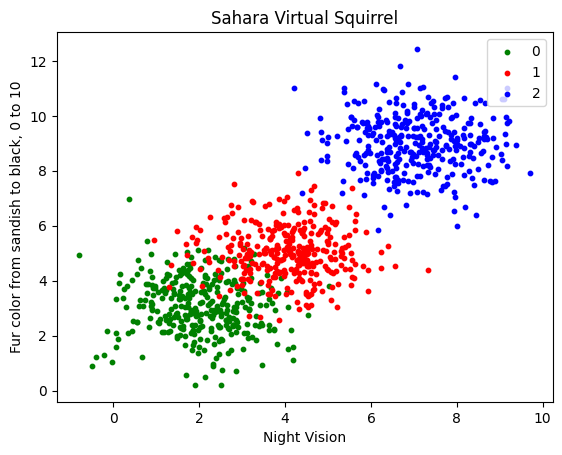

In [5]:
import matplotlib.pyplot as plt

colours = ('green','red','blue','magenta','yellow','cyan')
n_classes = 3

fig, ax = plt.subplots()
for n_classes in range(0,n_classes):
    ax.scatter(data[labels==n_classes,0],data[labels==n_classes,1],
                                             c=colours[n_classes],s=10,label=str(n_classes))
    
ax.set(xlabel="Night Vision",
      ylabel='Fur color from sandish to black, 0 to 10',
      title='Sahara Virtual Squirrel')

ax.legend(loc='upper right')

### Train data

In [6]:
from sklearn.model_selection import train_test_split

data_sets = train_test_split(data,
                            labels,
                            train_size=0.8,
                            test_size=0.2,
                            random_state=42)# garantees same outputs for every run

train_data,test_data,train_labels,test_labels = data_sets

In [7]:
#import model
from sklearn.neighbors import KNeighborsClassifier

#create classifier
knn = KNeighborsClassifier(n_neighbors=8)

#train
knn.fit(train_data, train_labels)

#test on test data
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [8]:
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(test_labels,calculated_labels))

Accuracy:  0.97


### Other Interesting Distributions

In [9]:
import numpy as np
import sklearn.datasets as ds
data , labels = ds.make_moons(n_samples=150,
                             shuffle=True,
                             noise=0.19,
                             random_state=None)

data += np.array(-np.ndarray.min(data[:,0]),
                -np.ndarray.min(data[:,1]))
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.296751512437999)

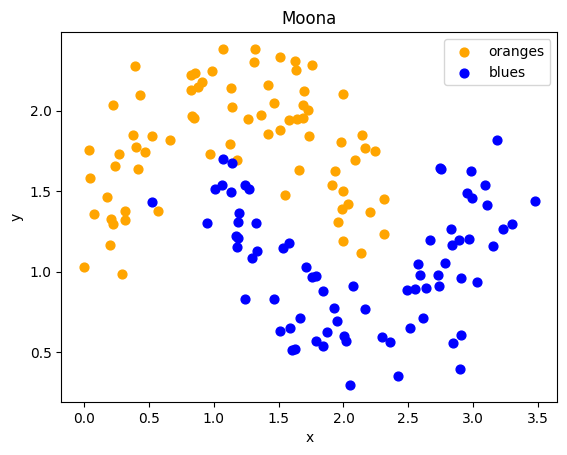

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0,1],
          c='orange',s=40,label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1,1],
          c='blue',s=40,label='blues')

ax.set(xlabel='x',
      ylabel='y',
      title='Moona')
ax.legend(loc='upper right')

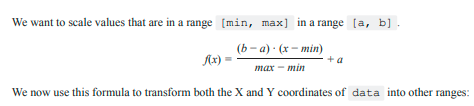

In [11]:
min_x_new, max_x_new = 33 ,88
min_y_new, max_y_new = 12,20

data, labels = ds.make_moons(n_samples=100,
                            shuffle=True,
                            noise=0.05,
                            random_state=None)

min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])

data -=np.array([min_x, min_y])
data *=np.array([(max_x_new - min_x_new) / (max_x - min_x),
                (max_y_new - min_y_new) / (max_y - min_y)])
data += np.array([min_x_new,min_y_new])

data[:6]

array([[34.37425428, 14.48456792],
       [57.15895455, 19.47244832],
       [80.51912249, 13.53625041],
       [88.        , 16.45364889],
       [51.87076562, 17.08470518],
       [35.90942974, 17.11696482]])

In [12]:
def scale_data(data, new_limits, inplace= False):
    if not inplace:
        data = data.copy()
    min_x, min_y = np.ndarray.min(data[:,0]),np.ndarray.min(data[:,1])
    max_x, max_y = np.ndarray.max(data[:,0]),np.ndarray.max(data[:,1])
    min_x_new,max_x_new = new_limits[0]
    min_y_new,max_y_new = new_limits[1]
    data -= np.array([min_x,min_y])
    data *= np.array([(max_x_new - min_x_new ) / (max_x - min_x),
                      (max_y_new - min_y_new) / (max_y - min_y)])
    data += np.array([min_x_new, min_y_new])
    
    if inplace:
        return None
    else:
        return data
    
data, labels = ds.make_moons(n_samples=100 ,
                             shuffle=True,
                             noise=0.05,
                             random_state=None)

scale_data(data,[(1,4),(3,8)],inplace= True)
data[:10]


array([[2.55999752, 3.11702896],
       [3.94097881, 5.90066348],
       [2.7196116 , 3.04551031],
       [1.98405271, 7.79201439],
       [1.77784759, 7.84017612],
       [3.5493991 , 3.46147905],
       [3.68217976, 3.67569215],
       [3.05602161, 3.13533961],
       [3.79704791, 4.35289487],
       [2.15280559, 4.6763729 ]])

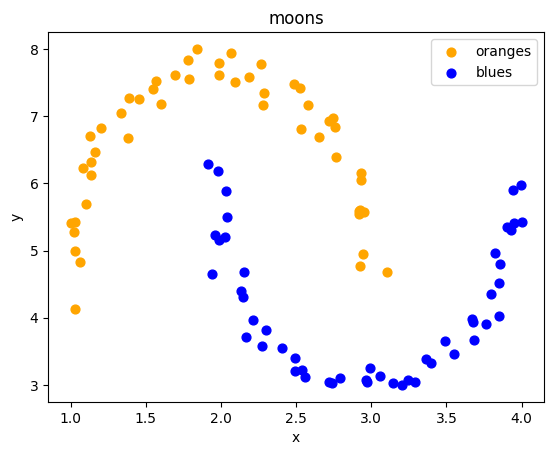

In [14]:
fig, ax = plt.subplots()

ax.scatter(data[labels==0,0], data[labels==0,1],
          c='orange',s=40,label='oranges')
ax.scatter(data[labels==1,0], data[labels==1,1],
          c='blue', s=40, label='blues')

ax.set(xlabel='x',
      ylabel='y',
      title='moons')
ax.legend(loc='upper right')

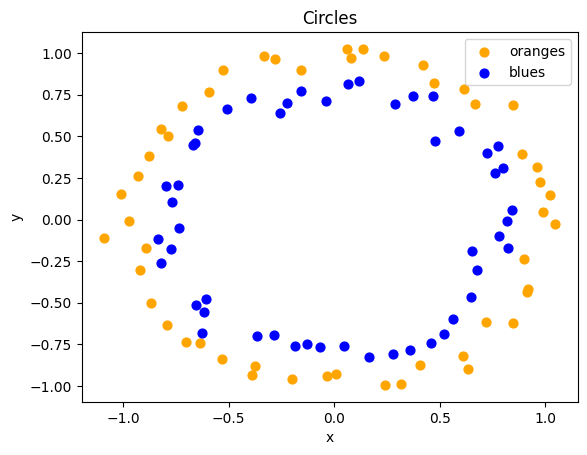

In [15]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100,
                              shuffle=True,
                              noise=0.05,
                              random_state=None)
fig,ax = plt.subplots()
ax.scatter(data[labels==0,0], data[labels==0,1],
          c='orange',s=40,label='oranges')
ax.scatter(data[labels==1,0], data[labels==1,1],
          c='blue', s=40, label='blues')

ax.set(xlabel='x',
      ylabel='y',
      title='Circles')
ax.legend(loc='upper right')

In [17]:
print(__doc__)

Automatically created module for IPython interactive environment


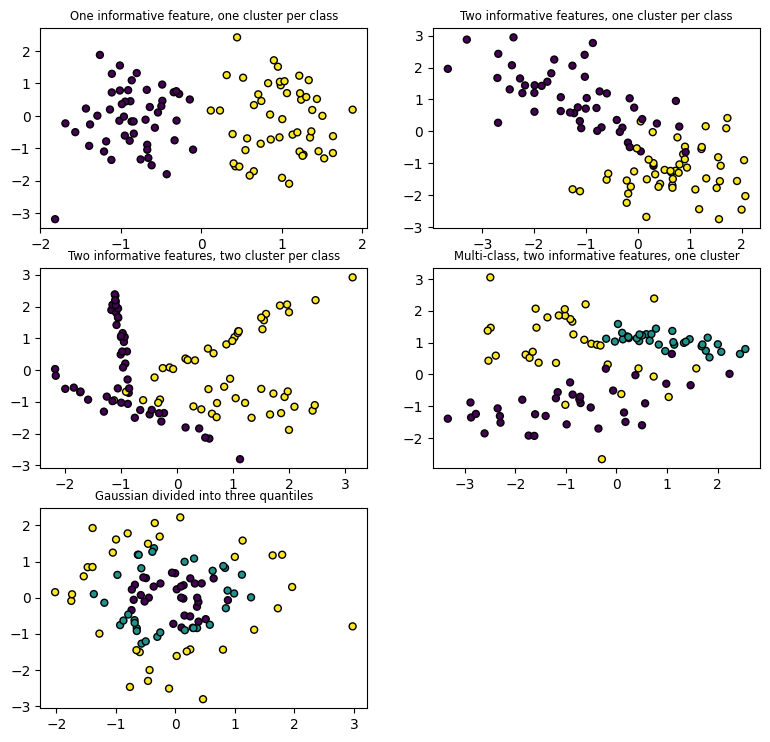

In [19]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8,8))
plt.subplots_adjust(bottom=.05,top=.9,left=.05,right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class",fontsize='small')

x1 , y1 = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1,s=25,edgecolors='k')

plt.subplot(322)
plt.title('Two informative features, one cluster per class',fontsize='small')
x1 , y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1,s=25,edgecolors='k')

plt.subplot(323)
plt.title('Two informative features, two cluster per class',fontsize='small')
x2 , y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(x2[:,0],x2[:,1],marker='o',c=y2,s=25,edgecolors='k')

plt.subplot(324)
plt.title('Multi-class, two informative features, one cluster',fontsize='small')
x1 , y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,n_classes=3)
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1,s=25,edgecolors='k')

plt.subplot(325)
plt.title('Gaussian divided into three quantiles',fontsize='small')
x1 , y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1,s=25,edgecolors='k')
plt.show()